In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 한글설정
!apt-get install -y fonts-nanum # 나눔 폰트 다운
# !ls -l /usr/share/fonts/truetype/ # 설치 확인
!rm -rf ~/.cache/matplotlib/* # 남아있는 폰트 캐시 제거
!fc-cache -fv # 폰트 캐시 생성

In [2]:
import matplotlib as mpl

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [3]:
# Data Read
data = pd.read_csv("../data/연도별장애인예산.csv")
data

,년도,예산 (단위 : 억)
0,2016,21806
1,2017,22869
2,2018,24614
3,2019,28656
4,2020,33595


In [4]:
# 년도 컬럼 지우기
data_cp = data.copy()
data_drop = data_cp.drop('년도', axis=1)
data_drop

,예산 (단위 : 억)
0,21806
1,22869
2,24614
3,28656
4,33595


In [5]:
# 장애인복지예산

# x축
x = [2016, 2017, 2018, 2019, 2020]
# y축
y_bar = list(data_drop['예산 (단위 : 억)'])

# 2015년 자료
money_2015 = 21442

# 증가율
up_2016 = ((y_bar[0] - money_2015)/money_2015)*100
up_2017 = ((y_bar[1] - y_bar[0])/y_bar[1])*100
up_2018 = ((y_bar[2] - y_bar[1])/y_bar[2])*100
up_2019 = ((y_bar[3] - y_bar[2])/y_bar[3])*100
up_2020 = ((y_bar[4] - y_bar[3])/y_bar[4])*100

y_plot = (up_2016, up_2017, up_2018, up_2019, up_2020)

print(f"y값 리스트\n{y_bar}\n증가율\n2016 : {up_2016}\n2017 : {up_2017}\n2018 : {up_2018}\n2019 : {up_2019}\n2020 : {up_2020}")


y값 리스트
[21806, 22869, 24614, 28656, 33595]
증가율
2016 : 1.6976028355563846
2017 : 4.64821373912283
2018 : 7.0894612821971235
2019 : 14.105248464544948
2020 : 14.70159249888376


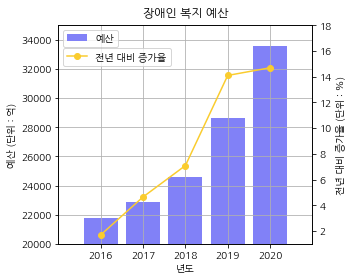

In [6]:
# 그래프 기본설정
plt.rcParams['figure.figsize']=(5,4)

# 1번
# 예산 그래프
fig, ax1 = plt.subplots()
# 눈금 간격
ax1.axis([2015, 2021, 20000, 35000])
# 라벨
ax1.set_xlabel("년도")
ax1.set_ylabel("예산 (단위 : 억)")
# 눈금
ax1.grid(True)
# 그래프 생성
ax1.bar(x, y_bar, color="#8181F7", label='예산')

# 2번
ax2 = ax1.twinx()
# 라벨
ax2.set_ylabel("전년 대비 증가율 (단위 : %)")
# 눈금 간격
ax2.axis([2015, 2021, 1, 18])
# 그래프 생성
ax2.plot(x, y_plot, color='#FACC2E', marker='o', label='전년 대비 증가율')

# x측 긴갹
plt.xticks([2016, 2017, 2018, 2019, 2020])
# 제목
plt.title("장애인 복지 예산", loc='center', pad=10)
# 범례
ax1.legend(loc='upper left')
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.92))

plt.tight_layout()
# plt.show()
plt.savefig('장애인 복지 예산 시각화.png', dpi=200, facecolor='#FFFFFF')